In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [48]:
# Loading in returns dataset
returns = pd.read_pickle("../Data/returns.pkl")
returns

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9660J1,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Looking at a sample stock
sample = returns[["916328"]]
sample

,916328
date,
1990-01-02,NaN
1990-01-03,0.361421
1990-01-04,-0.180060
1990-01-05,-1.079730
1990-01-08,0.000000
...,...
2021-05-24,NaN
2021-05-25,NaN
2021-05-26,NaN


In [50]:
# Trimming NaN sections
sample.dropna(inplace=True)
sample.shape

(7893, 1)

In [63]:
# Restructuring data for last {step} days
steps = 4

for step in range(1, steps + 1):
    col_name = "t-" + str(step)
    sample[col_name] = sample.shift(step)["916328"]
    
sample.dropna(inplace=True)
sample

,916328,t-1,t-2,t-3,t-4
date,,,,,
1990-01-09,-0.364707,0.000000,-1.079730,-0.180060,0.361421
1990-01-10,-1.281146,-0.364707,0.000000,-1.079730,-0.180060
1990-01-11,0.926980,-1.281146,-0.364707,0.000000,-1.079730
1990-01-12,-2.018002,0.926980,-1.281146,-0.364707,0.000000
1990-01-15,-1.309658,-2.018002,0.926980,-1.281146,-0.364707
...,...,...,...,...,...
2021-04-26,-0.592004,-0.153846,0.734095,2.166667,-3.637678
2021-04-27,-0.717899,-0.592004,-0.153846,0.734095,2.166667
2021-04-28,-0.205423,-0.717899,-0.592004,-0.153846,0.734095


In [65]:
# Running linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=sample[["t-1", "t-2", "t-3", "t-4"]], y=sample["916328"])

LinearRegression()

In [68]:
y_pred = model.predict(sample[["t-1", "t-2", "t-3", "t-4"]])

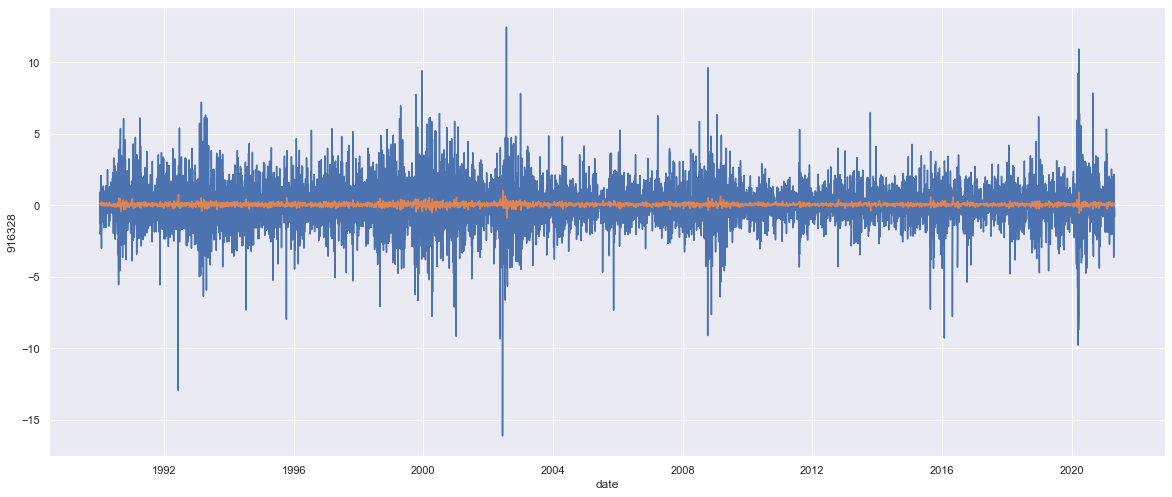

In [76]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(data=sample, y="916328", x="date")
sns.lineplot(y=y_pred, x="date", data=sample)